# **Import Libraries**



In [ ]:
  !pip install mlxtend

In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile
import io

# **Import Data**



In [37]:
from google.colab import files

uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded['Customer Survey.xlsx']))


Saving Customer Survey.xlsx to Customer Survey (1).xlsx


In [38]:
df.head(5)

,Date,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,2021-03-20,11:53:45,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,2021-03-20,11:54:01,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,2021-03-20,11:54:05,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,2021-03-20,11:54:13,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,2021-03-20,11:54:18,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [39]:
print(df.shape)
print(df.columns)
print(df.info())

(44, 63)
Index(['Date', 'ประทับเวลา', 'จักรยานเสือภูเขา', 'คอลลาเจน', 'Brownie อวกาศ',
       'แม่โขง', 'Botox', 'กัญชา', 'กัญชง', 'เครื่องวัดความดัน',
       'หลอดไฟเปลี่ยนสีได้', 'คอร์ส bikini wax', 'เก้าอี้นวดไฟฟ้า',
       'ต้นไม้ประดับห้อง', 'หมอนข้าง', 'ตาชั่ง ', 'คอร์สโบท็อกกราม', 'แสงโสม',
       'กะหรี่(ปั๊บ)', 'Lego', 'แฟน ที่แปลว่าพัดลม', 'ยาดอง',
       'ชุดนอนไม่ได้นอน', 'ที่ยกน้ำหนัก (Dumbell)',
       'เครื่องดูดฝุ่นอัตโนมัติ (robot)', 'เนื้อวากิล', 'หมูแดดเดียว', 'drone',
       'เครื่องย่อยเศษอาหาร', 'เสื้อซีทรู', 'ไพ่ยิปซี', 'เนื้อย่าง',
       'เครื่องทำลายเอกสาร', 'กระเป๋า', 'ชาบู', 'Surfskate', 'Board game',
       'เครื่องย่อยเศษอาหาร.1', 'ชุดน้องหมา', 'Omakase', 'เม็ดมะม่วงหิมพานต์',
       'ไฟอัจฉริยะ', 'บัตตาเลี่ยนที่ตัดผม', 'ไดร์เป่าผม Dyson', 'แผ่นเสียง',
       'กรรไกรตัดขนจมูก', 'PS5', 'เครื่องตรวจน้ำตาลในเลือด', 'โรตี', 'กะปิดอง',
       'น้องหมา', 'แพ็คเกจไทยเที่ยวไทย', 'เกมส์ FIFA Online', 'มะม่วงเบา',
       'ห้องน้ำแมวอัตโนมัติ', 'กระเป๋า chanel', 'ข้า

# **EDA**

Explore the missing value

In [40]:
missing = df.isnull().sum()
print(missing)


Date                             0
ประทับเวลา                       0
จักรยานเสือภูเขา                 0
คอลลาเจน                         0
Brownie อวกาศ                    0
                                ..
หมอนสุขภาพสำหรับคนนอนไม่หลับ     0
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น    0
น้ำส้มดีโด้                      0
Software ถูกลิขสิทธิ์            0
ครีมกันแดด                       0
Length: 63, dtype: int64


Drop row n/a and columns 



In [41]:
df_itab = df.dropna()
del df_itab['ประทับเวลา']
del df_itab['Date']
del df_itab['เครื่องย่อยเศษอาหาร.1']

df_itab.head()

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
6,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


transform data (เคย = 1 , ไม่เคย = 0)

In [43]:
df_itab_data = df_itab.replace(['ไม่เคย','เคย'],[0,1])
df_itab_data.head(5)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,1,1


Find top 10 items and bottom 10 items

In [51]:
hot_items = df_itab_data.sum()
print("Top 10 Items")
print(hot_items.sort_values(ascending=False).head(10))
print("\nBottom 10 Items")
print(hot_items.sort_values(ascending=True).head(10))

Top 10 Items
ครีมกันแดด               39
กระเป๋า                  39
ชาบู                     39
โรตี                     38
กะหรี่(ปั๊บ)             37
เม็ดมะม่วงหิมพานต์       35
หมอนข้าง                 34
แฟน ที่แปลว่าพัดลม       32
หมูแดดเดียว              31
Software ถูกลิขสิทธิ์    31
dtype: int64

Bottom 10 Items
เครื่องย่อยเศษอาหาร              2
PS5                              2
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น    3
กระเป๋า chanel                   3
ไดร์เป่าผม Dyson                 3
ห้องน้ำแมวอัตโนมัติ              3
คอร์ส bikini wax                 3
Surfskate                        3
กัญชง                            3
ข้าวขาหมูคากิคาจักออนไลน์        4
dtype: int64


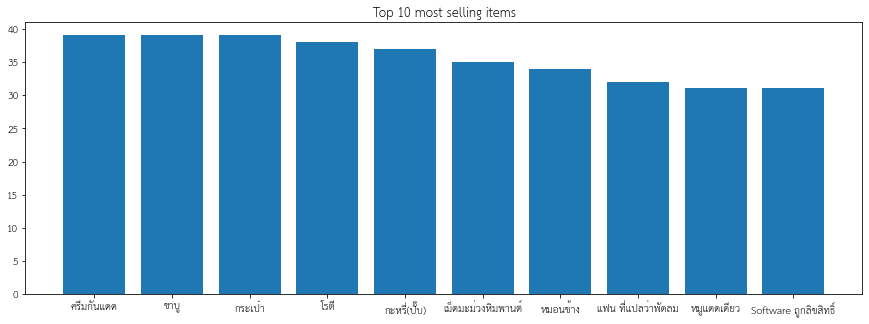

In [81]:
df_for_top10_Items= hot_items[1:].sort_values(ascending=False).head(10)
Item_array= np.arange(len(df_for_top10_Items))

plt.figure(figsize=(15,5))
Items_name = df_for_top10_Items.index
plt.bar(Item_array,df_for_top10_Items.iloc[:])
plt.xticks(Item_array,Items_name)
plt.title('Top 10 most selling items')
plt.show()


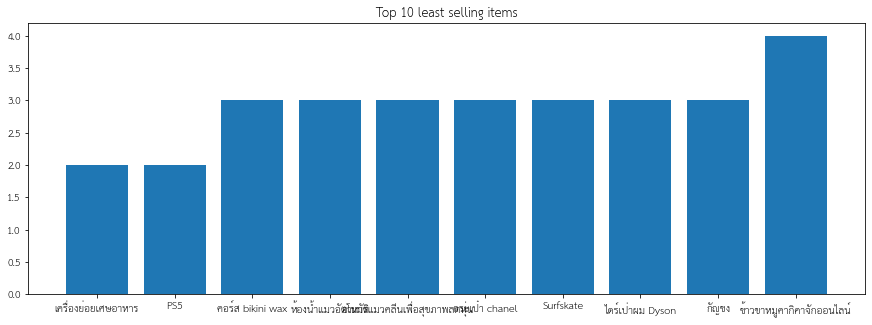

In [83]:
df_for_least10_Items= hot_items[1:].sort_values(ascending=True).head(10)
Item_array= np.arange(len(df_for_least10_Items))

plt.figure(figsize=(15,5))
Items_name = df_for_least10_Items.index
plt.bar(Item_array,df_for_least10_Items.iloc[:])
plt.xticks(Item_array,Items_name)
plt.title('Top 10 least selling items')
plt.show()

In [85]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

hot_encoded_df = df_itab_data.applymap(encode_units)
hot_encoded_df['Transaction'] = range(1, len(df_itab_data) + 1)
hot_encoded_df = hot_encoded_df.set_index('Transaction')
print(hot_encoded_df.head(10))

             จักรยานเสือภูเขา  คอลลาเจน  ...  Software ถูกลิขสิทธิ์  ครีมกันแดด
Transaction                              ...                                   
1                           0         0  ...                      1           1
2                           0         1  ...                      0           1
3                           1         0  ...                      1           1
4                           0         0  ...                      0           1
5                           0         0  ...                      1           1
6                           0         0  ...                      1           1
7                           0         1  ...                      1           1
8                           1         0  ...                      1           1
9                           1         1  ...                      1           1
10                          0         0  ...                      1           1

[10 rows x 60 columns]


# **Association Rule**

Association rule: apriori, set min support = 0.5

In [166]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.5, use_colnames=True)

In [204]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(กะหรี่(ปั๊บ)),(คอลลาเจน),0.948718,0.538462,0.512821,0.540541,1.003861,0.001972,1.004525
1,(คอลลาเจน),(กะหรี่(ปั๊บ)),0.538462,0.948718,0.512821,0.952381,1.003861,0.001972,1.076923
2,(กระเป๋า),(คอลลาเจน),1.000000,0.538462,0.538462,0.538462,1.000000,0.000000,1.000000
3,(คอลลาเจน),(กระเป๋า),0.538462,1.000000,0.538462,1.000000,1.000000,0.000000,inf
4,(ชาบู),(คอลลาเจน),1.000000,0.538462,0.538462,0.538462,1.000000,0.000000,1.000000


focus rule that lift >= mean of lift and confidence >= mean of confidence

In [226]:
lift_mean = rules['lift'].mean()
confindenc_mean = rules['confidence'].mean()
rules[ (rules['lift'] >= lift_mean) &
       (rules['confidence'] >= confindenc_mean) ]
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(กะหรี่(ปั๊บ)),(คอลลาเจน),0.948718,0.538462,0.512821,0.540541,1.003861,0.001972,1.004525
1,(คอลลาเจน),(กะหรี่(ปั๊บ)),0.538462,0.948718,0.512821,0.952381,1.003861,0.001972,1.076923
2,(กระเป๋า),(คอลลาเจน),1.000000,0.538462,0.538462,0.538462,1.000000,0.000000,1.000000
3,(คอลลาเจน),(กระเป๋า),0.538462,1.000000,0.538462,1.000000,1.000000,0.000000,inf
4,(ชาบู),(คอลลาเจน),1.000000,0.538462,0.538462,0.538462,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...
228833,(ครีมกันแดด),"(กระเป๋า, กะหรี่(ปั๊บ), แฟน ที่แปลว่าพัดลม, หม...",1.000000,0.512821,0.512821,0.512821,1.000000,0.000000,1.000000
228834,(เนื้อย่าง),"(กระเป๋า, กะหรี่(ปั๊บ), แฟน ที่แปลว่าพัดลม, หม...",0.717949,0.615385,0.512821,0.714286,1.160714,0.071006,1.346154
228835,(ชาบู),"(กระเป๋า, กะหรี่(ปั๊บ), แฟน ที่แปลว่าพัดลม, หม...",1.000000,0.512821,0.512821,0.512821,1.000000,0.000000,1.000000
228836,(โรตี),"(กระเป๋า, กะหรี่(ปั๊บ), แฟน ที่แปลว่าพัดลม, หม...",0.974359,0.512821,0.512821,0.526316,1.026316,0.013149,1.028490


**Support VS Confidence**


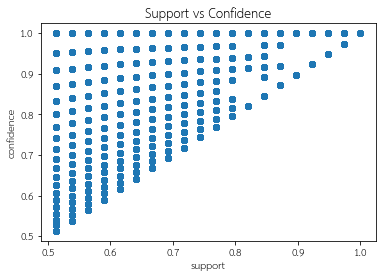

In [156]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

**Support vs Lift**

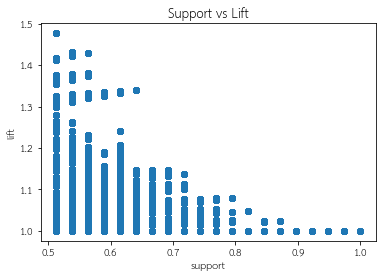

In [128]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

**Lift vs Confidence**

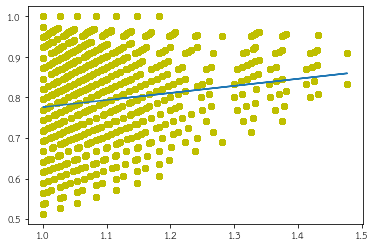

In [129]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

focus on 1-item set




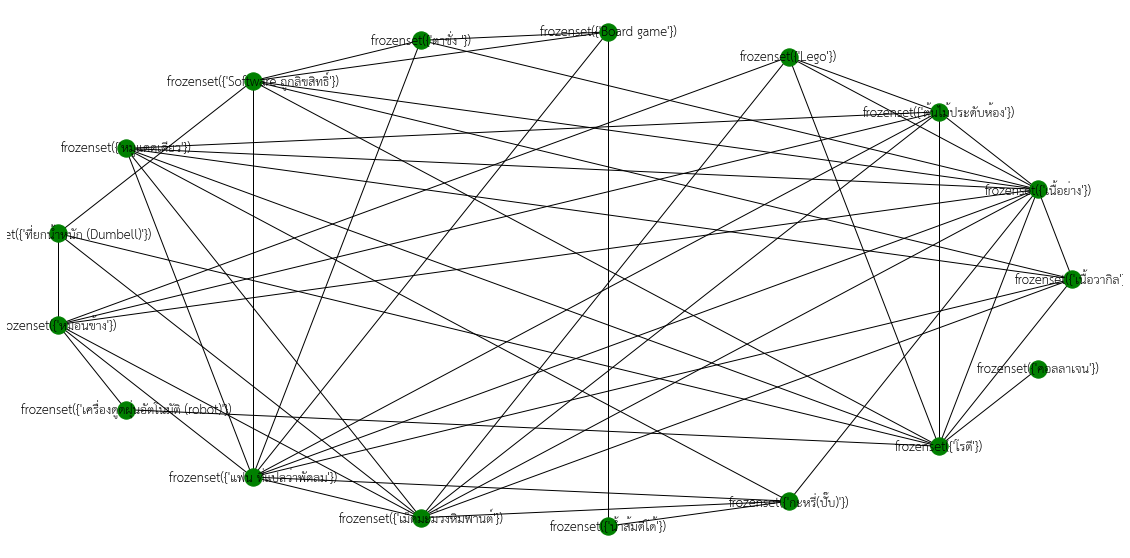

In [260]:
import matplotlib.pyplot as plt
import networkx as nx

rules_focus = rules.head(234)
rules_focus = rules_focus.sort_values(by='lift',ascending=False).head(100)

fig, ax=plt.subplots(figsize=(20,10))
GA=nx.from_pandas_edgelist(rules_focus,source='antecedents',target='consequents')
nx.draw_circular(GA, with_labels=True,font_family='TH Sarabun New',node_color = 'green')
plt.show()


# **Cosine Similarity Item-to-Item**

In [243]:
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)
item_item_matrix.head(5)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
จักรยานเสือภูเขา,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
คอลลาเจน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brownie อวกาศ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
แม่โขง,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Botox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

item_item_matrix.head(5)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
จักรยานเสือภูเขา,1,0.583212,0.267261,0.385758,0.404061,0.218218,0.154303,0.5,0.507093,0.154303,0.119523,0.524142,0.595854,0.576557,0.267261,0.370625,0.52725,0.587975,0.519701,0.241747,0.202031,0.709208,0.583212,0.524142,0.432014,0.358569,0.377964,0.338062,0.338062,0.555584,0.505076,0.599145,0.599145,0.46291,0.471728,0.370625,0.356348,0.542105,0.667124,0.303046,0.46291,0.377964,0.552052,0.188982,0.534522,0.606977,0.445435,0.377964,0.367884,0.119523,0.467707,0.46291,0.308607,0.267261,0.101015,0.483046,0.46291,0.505076,0.62402,0.599145
คอลลาเจน,0.583212,1,0.327327,0.377964,0.57735,0.178174,0.251976,0.408248,0.345033,0.377964,0.09759,0.641941,0.673633,0.641941,0.436436,0.363137,0.717496,0.698297,0.617213,0.394771,0.412393,0.668153,0.571429,0.513553,0.587896,0.29277,0.308607,0.621059,0.483046,0.57735,0.412393,0.733799,0.733799,0.251976,0.470757,0.544705,0.363696,0.700826,0.484182,0.329914,0.251976,0.385758,0.507093,0.154303,0.436436,0.743392,0.509175,0.46291,0.550689,0.19518,0.545545,0.377964,0.377964,0.218218,0.247436,0.563436,0.377964,0.659829,0.705476,0.733799
Brownie อวกาศ,0.267261,0.327327,1,0.433013,0.377964,0.612372,0.57735,0.133631,0.158114,0.288675,0.447214,0.392232,0.257248,0.294174,0.25,0.27735,0.328798,0.4,0.353553,0.301511,0.188982,0.408248,0.436436,0.392232,0.269408,0.447214,0.353553,0.158114,0.316228,0.283473,0.188982,0.320256,0.320256,0.288675,0.294174,0.138675,0.333333,0.338062,0.416025,0.377964,0.288675,0.53033,0.258199,0.353553,0.333333,0.324443,0.333333,0.176777,0.229416,0.447214,0.25,0.57735,0.866025,0.5,0.188982,0.387298,0.57735,0.283473,0.359211,0.320256
แม่โขง,0.385758,0.377964,0.433013,1,0.218218,0.471405,0.333333,0.385758,0.273861,0.166667,0.516398,0.566139,0.495074,0.396297,0.144338,0.880705,0.569495,0.404145,0.51031,0.348155,0.327327,0.53033,0.503953,0.566139,0.570323,0.387298,0.204124,0.273861,0.456435,0.49099,0.218218,0.5547,0.5547,0.166667,0.452911,0.0800641,0.481125,0.58554,0.240192,0.327327,0.333333,0.408248,0.596285,0.204124,0.19245,0.561951,0.3849,0,0.331133,0.387298,0.433013,0.5,0.333333,0.144338,0.218218,0.521749,0.333333,0.436436,0.362933,0.5547
Botox,0.404061,0.57735,0.377964,0.218218,1,0.154303,0.218218,0.303046,0.358569,0.218218,0.169031,0.2965,0.388922,0.2965,0.755929,0.209657,0.372822,0.302372,0.467707,0.341882,0.428571,0.540062,0.329914,0.370625,0.271538,0.169031,0.267261,0.478091,0.358569,0.357143,0.285714,0.423659,0.423659,0.218218,0.14825,0.314485,0.251976,0.383326,0.314485,0.285714,0.218218,0.267261,0.39036,0.267261,0.503953,0.429198,0.377964,0.267261,0.346844,0.169031,0.283473,0.218218,0.436436,0.377964,0.142857,0.39036,0.218218,0.285714,0.475191,0.423659


In [271]:
links = item_item_matrix.rename_axis('related item',axis='columns').stack().reset_index()
links.columns = ['item', 'related item','score']
links

,item,related item,score
0,จักรยานเสือภูเขา,จักรยานเสือภูเขา,1
1,จักรยานเสือภูเขา,คอลลาเจน,0.583212
2,จักรยานเสือภูเขา,Brownie อวกาศ,0.267261
3,จักรยานเสือภูเขา,แม่โขง,0.385758
4,จักรยานเสือภูเขา,Botox,0.404061
...,...,...,...
3595,ครีมกันแดด,หมอนสุขภาพสำหรับคนนอนไม่หลับ,0.620174
3596,ครีมกันแดด,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,0.27735
3597,ครีมกันแดด,น้ำส้มดีโด้,0.847319
3598,ครีมกันแดด,Software ถูกลิขสิทธิ์,0.891556


In [274]:
links_filtered=links.loc[ (links['score'] > 0.65) & (links['item'] != links['related item']) ]
links_filtered = links_filtered.sort_values(by=['score'],ascending=False)
links_filtered

,item,related item,score
1979,ชาบู,ครีมกันแดด,1
1919,กระเป๋า,ครีมกันแดด,1
1951,ชาบู,กระเป๋า,1
3572,ครีมกันแดด,ชาบู,1
3571,ครีมกันแดด,กระเป๋า,1
...,...,...,...
2430,ไดร์เป่าผม Dyson,เครื่องทำลายเอกสาร,0.654654
1041,Lego,ที่ยกน้ำหนัก (Dumbell),0.653197
1277,ที่ยกน้ำหนัก (Dumbell),Lego,0.653197
2293,ไฟอัจฉริยะ,ตาชั่ง,0.652714


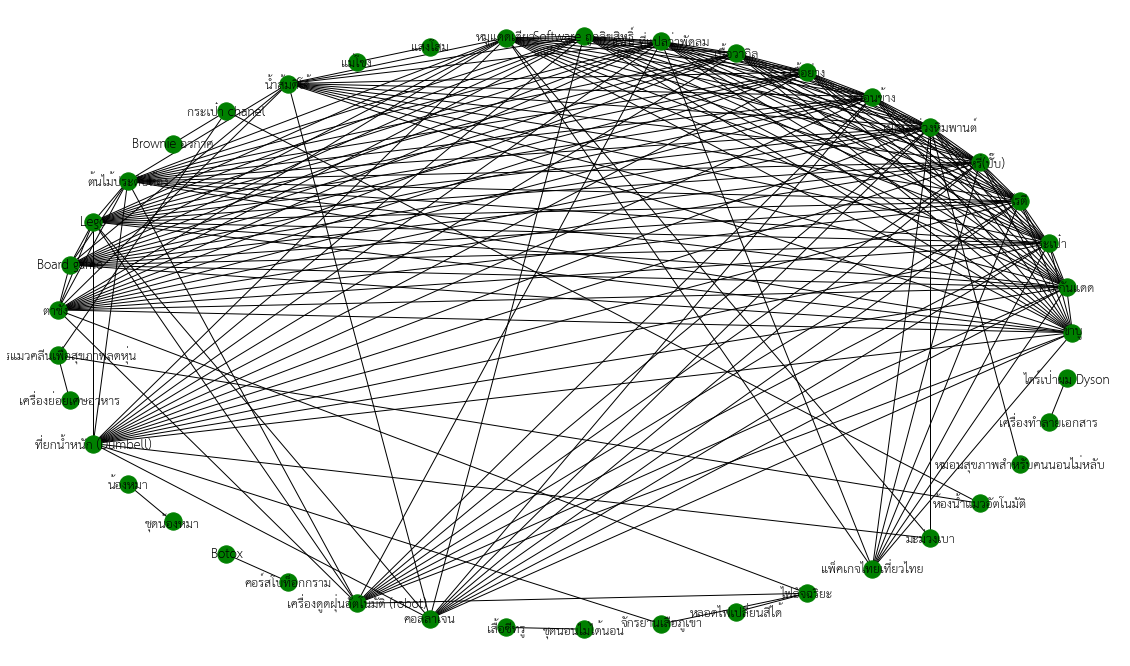

In [275]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(20,12))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw_circular(GA,with_labels=True,font_family='TH Sarabun New',node_color='green')
plt.show()

In [276]:
item_item_all = pd.DataFrame(index=item_item_matrix.columns,columns=range(1,4))
for i in range(0,len(item_item_matrix.columns)):
    item_item_all.iloc[i,:3]=item_item_matrix.iloc[0:,i].sort_values(ascending=False)[:3].index
    
item_item_all.head(10)

,1,2,3
จักรยานเสือภูเขา,จักรยานเสือภูเขา,ที่ยกน้ำหนัก (Dumbell),ไฟอัจฉริยะ
คอลลาเจน,คอลลาเจน,โรตี,ครีมกันแดด
Brownie อวกาศ,Brownie อวกาศ,กระเป๋า chanel,กัญชา
แม่โขง,แม่โขง,แสงโสม,กรรไกรตัดขนจมูก
Botox,Botox,คอร์สโบท็อกกราม,คอลลาเจน
กัญชา,กัญชา,Brownie อวกาศ,เกมส์ FIFA Online
กัญชง,กัญชง,แผ่นเสียง,Brownie อวกาศ
เครื่องวัดความดัน,เครื่องวัดความดัน,เครื่องตรวจน้ำตาลในเลือด,โรตี
หลอดไฟเปลี่ยนสีได้,หลอดไฟเปลี่ยนสีได้,ไฟอัจฉริยะ,Software ถูกลิขสิทธิ์
คอร์ส bikini wax,คอร์ส bikini wax,เสื้อซีทรู,หมอนสุขภาพสำหรับคนนอนไม่หลับ


In [278]:
links_filtered.to_csv('Match more than 0.65.csv',index=False)

In [279]:
item_item_all.to_csv('item-to-item.csv',index=False)